In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:
class Draw:
    """
    This class provides tools for visualizing experimental data using 2D and 3D plots. 

    The `Draw` class supports three types of plots:
    1. Time-based plots: Useful for visualizing execution time.
    2. Acceleration-based plots: Useful for speedup visualization by comparing the initial result with subsequent values.
    3. 3D scatter plots: Useful for presenting data points in three-dimensional space.

    Methods:
    --------
    1. draw_grafic:
        Plots a single 2D graph.
        Parameters:
            - dir (str): Path to the file containing data values.
            - name (str): Type of the graph ('Time' or 'Accelerate').
            - size_input_data (int, optional): The size of the input data involved in the experiment.
            - x (list, optional): Custom x-axis values; if not provided, defaults to an enumeration from 1 to n.
            - info (str, optional): Additional information for the graph title.
            - x_label (str, optional): Label for the x-axis.
            - y_label (str, optional): Label for the y-axis.

    2. draw_grafics:
        Plots multiple 2D graphs on the same figure.
        Parameters:
            - dirs (list[str]): List of file paths containing data for multiple experiments.
            - labels (list[str]): Labels for each dataset to be used in the legend.
            - name (str): Type of the graph ('Time' or 'Accelerate').
            - size_input_data (int, optional): Size of the input data.
            - x (list, optional): Custom x-axis values.
            - info (str, optional): Additional information for the graph title.
            - x_label (str, optional): Label for the x-axis.
            - y_label (str, optional): Label for the y-axis.

    3. draw_3D_grafic:
        Creates a 3D scatter plot.
        Parameters:
            - dir (str): Path to the file containing data with x, y, and z values.
            - x_label (str): Label for the x-axis.
            - y_label (str): Label for the y-axis.
            - z_label (str): Label for the z-axis.
            - title (str): Title of the graph.
    
    Features:
    ---------
    - Data is read from text files, where each line represents a value (for 2D plots) or a set of coordinates (for 3D plots).
    - Acceleration graphs calculate speedup as the ratio between the first value and subsequent values.
    - Titles, axis labels, and grid settings are customizable.
    - For 3D graphs, annotations and vertical lines to the z=0 plane provide additional context.
    """
   
    @staticmethod
    def draw_grafic(dir: str,
                    name: str,
                    size_input_data: int = None,
                    x: list = None,
                    info: str = None,
                    x_label: str = None,
                    y_label: str = None
                    ) -> None:

        y = list()
        with open(dir, 'r') as file:
            for line in file:
                y.append(float(line))

        if name == 'Accelerate':
            simple = y[0]
            y = [simple / res if res > 0.0 else 0.0 for res in y]
            
        if not x:
            x = [(k + 1) for k in range(len(y))]
            
        plt.plot(x, y, color="blue", marker="o")
        
        plt.xlabel("num processors" if not x_label else x_label)
        if name == 'Time':
           plt.ylabel(f"{name} (seconds)" if not y_label else y_label)
        else:
            plt.ylabel(name if not y_label else y_label)
         
        if size_input_data:
            name = name + f", N={str(size_input_data)}"
        if info is not None:
            name = name + ", " + info
        
        plt.title(name)
        plt.grid(True)
        
    @staticmethod
    def draw_grafics(dirs: list[str],
                    labels: list[str],
                    name: str,
                    size_input_data: int = None,
                    x: list = None,
                    info: str = None,
                    x_label: str = None,
                    y_label: str = None
                    ) -> None:
        
        for dir, label in zip(dirs, labels):
            y = []
            with open(dir, 'r') as file:
                for line in file:
                    y.append(float(line))
                    
            if not x:
                x = [(k + 1) for k in range(len(y))]
            
            if name == 'Accelerate':
                simple = y[0]
                y = [simple / res if res > 0.0 else 0.0 for res in y]
                
            plt.plot(x, y, label=label, marker="o")
            
        plt.xlabel("num processors" if not x_label else x_label)
        if name == 'Time':
           plt.ylabel(f"{name} (seconds)" if not y_label else y_label)
        else:
            plt.ylabel(name if not y_label else y_label)
        
        if size_input_data:
            name = name + f", N={str(size_input_data)}"
        if info is not None:
            name = name + ", " + info
        
        plt.legend()
        plt.title(name)
        plt.grid(True)
        
    @staticmethod
    def draw_3D_grafic(dir: str,
                       x_label: str,
                       y_label: str,
                       z_label: str,
                       title: str,
                       normalize: int = None
        ) -> None:
        
        fig = plt.figure(figsize=(12, 9))
        ax = fig.add_subplot(111, projection='3d')
        
        x = list()
        y = list()
        z = list()
            
        
        with open(dir, 'r') as file:
            for line in file:
                line = line.split(' ')
                x.append(int(line[0]))
                y.append(int(line[1]))
                z.append(float(line[2]))
                
        if normalize:
            z = [r / normalize for r in z]
        
        ax.scatter(x, y, z, c='r', marker='o')
        
        # Добавление аннотаций и линий к каждой точке
        for i in range(len(x)):
            # Линия от точки к плоскости z=0
            ax.plot([x[i], x[i]], [y[i], y[i]], [0, z[i]], color='gray', linestyle='--')
            
            # Аннотация с координатами
            label = f'({z[i]:.2f})'
            ax.text(x[i], y[i], z[i], label, fontsize=8, color='blue')
        
        # Настройки осей
        ax.set_xlabel(x_label, labelpad=0)
        ax.set_ylabel(y_label, labelpad=0)
        ax.set_zlabel(z_label, labelpad=0)
        ax.set_title(title) 
    
        
        plt.tight_layout()
        
        
    

In [168]:
labels = ["Bcast", "Scatter"]
dirs = [f"ssh/2/results{label}.log" for label in labels]
x = [1] + [(i + 1) * 2 for i in range(16)]

# №1

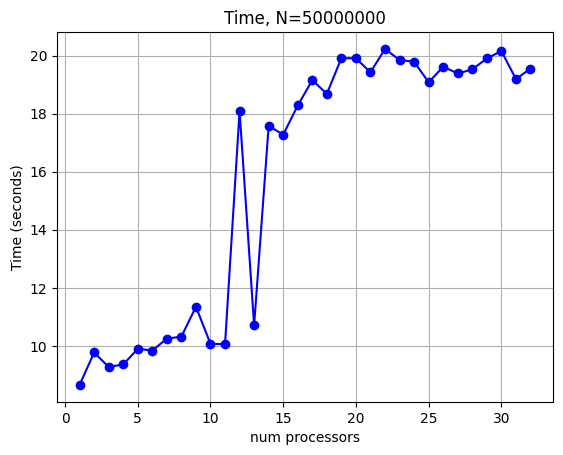

In [169]:
Draw.draw_grafic("ssh/1/results.log", 'Time', 5*10**7)

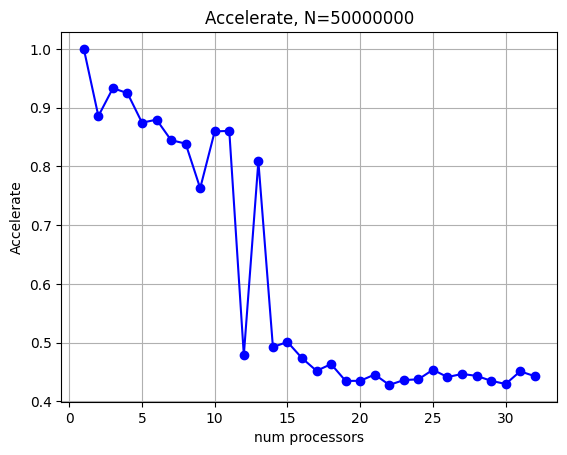

In [170]:
Draw.draw_grafic("ssh/1/results.log", 'Accelerate', 5*10**7)

# №2

In [171]:
labels = ["Bcast", "Scatter"]
dirs = [f"ssh/2/results{label}.log" for label in labels]
x = [1] + [(i + 1) * 2 for i in range(16)]

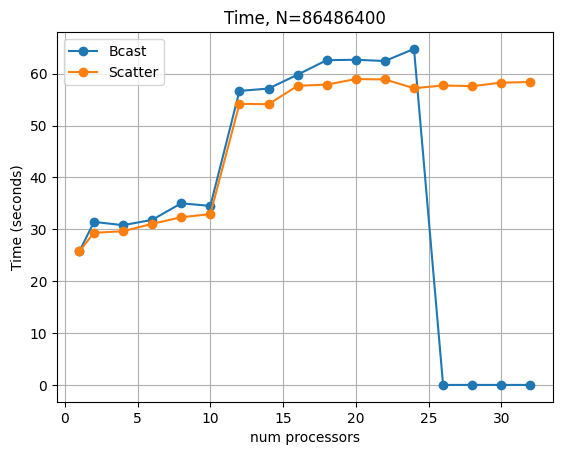

In [172]:
Draw.draw_grafics(dirs, labels, 'Time', 86486400, x)

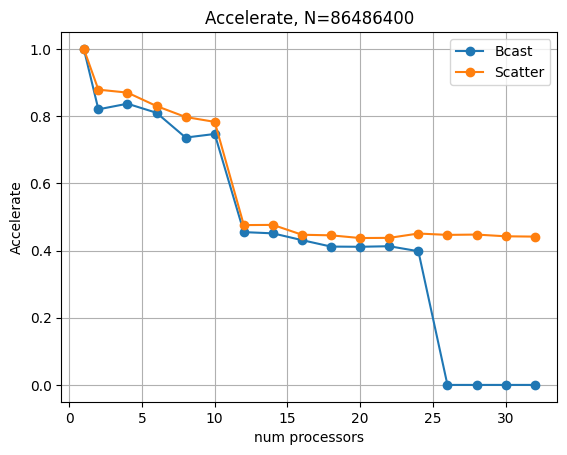

In [173]:
Draw.draw_grafics(dirs, labels, 'Accelerate', 86486400, x)

# №3

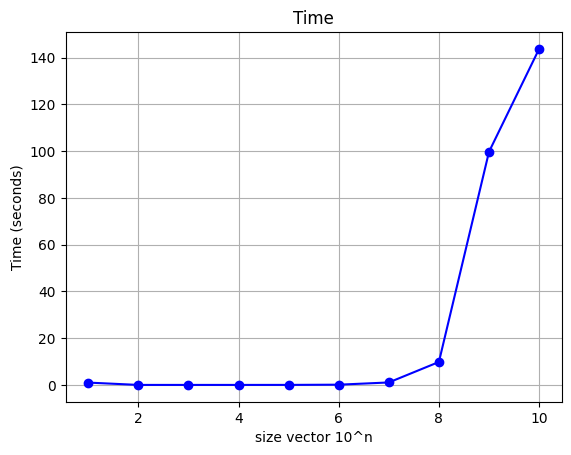

In [174]:
Draw.draw_grafic("ssh/3/results.log", 'Time', x_label='size vector 10^n')

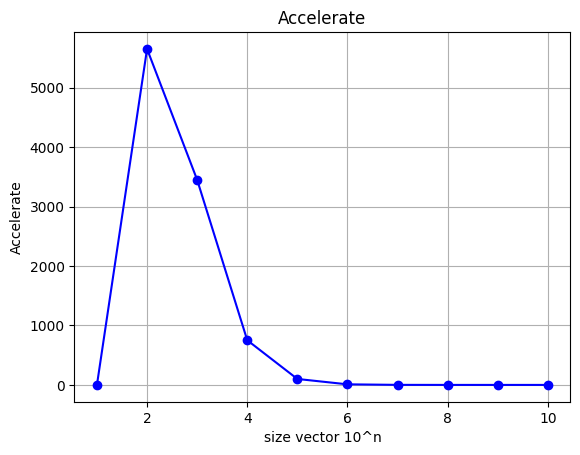

In [175]:
Draw.draw_grafic("ssh/3/results.log", 'Accelerate', x_label='size vector 10^n')

# №4

In [8]:
labels = ["Fox", "Striped"]
dirs = [f"ssh/4/results{label}.log" for label in ['F', 'S']]
x = [(i + 1)**2 for i in range(12)]

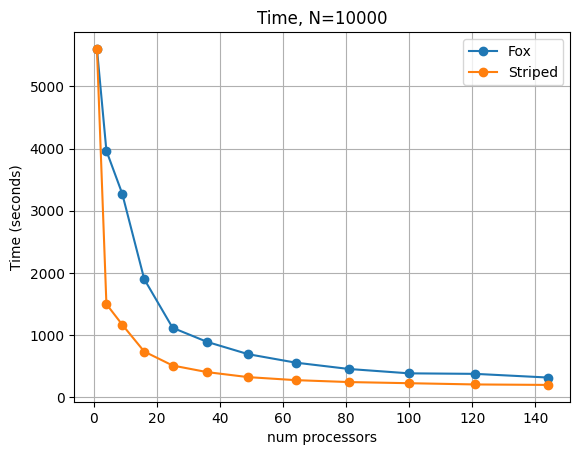

In [10]:
Draw.draw_grafics(dirs, labels, 'Time', 10000, x)

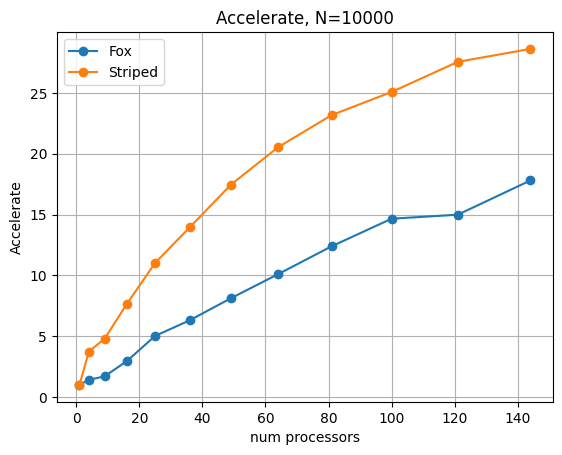

In [11]:
Draw.draw_grafics(dirs, labels, 'Accelerate', 10000, x)

# №5

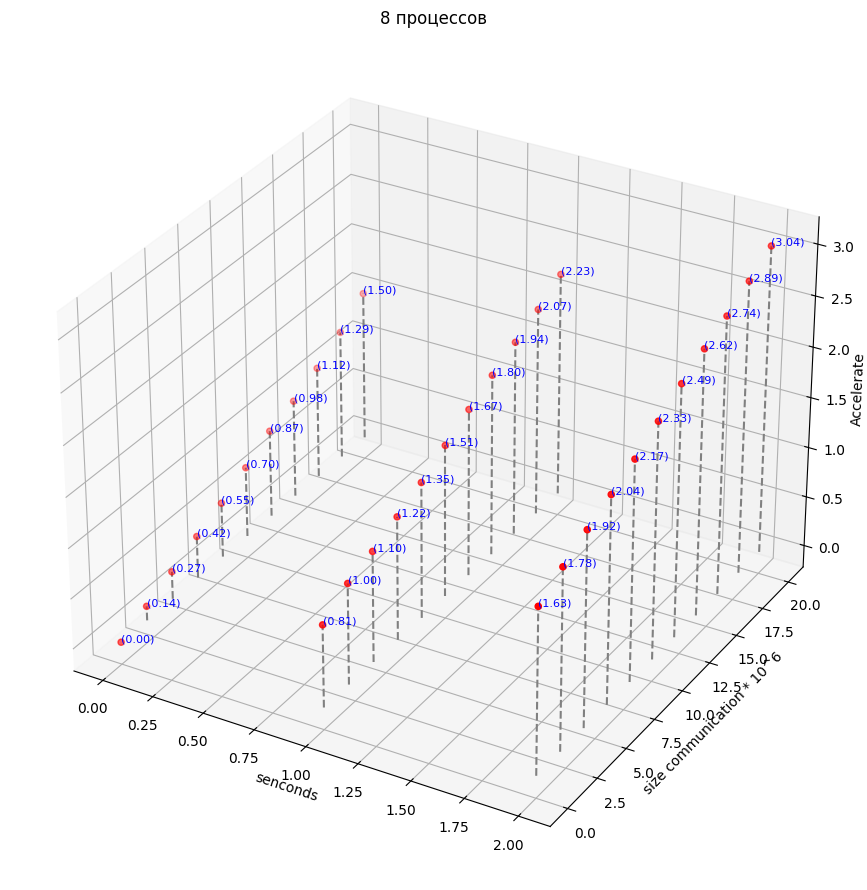

In [179]:
Draw.draw_3D_grafic("ssh/5/results_8.log", 'senconds', 'size communication * 10^6', 'Accelerate', '8 процессов', 1.228937)

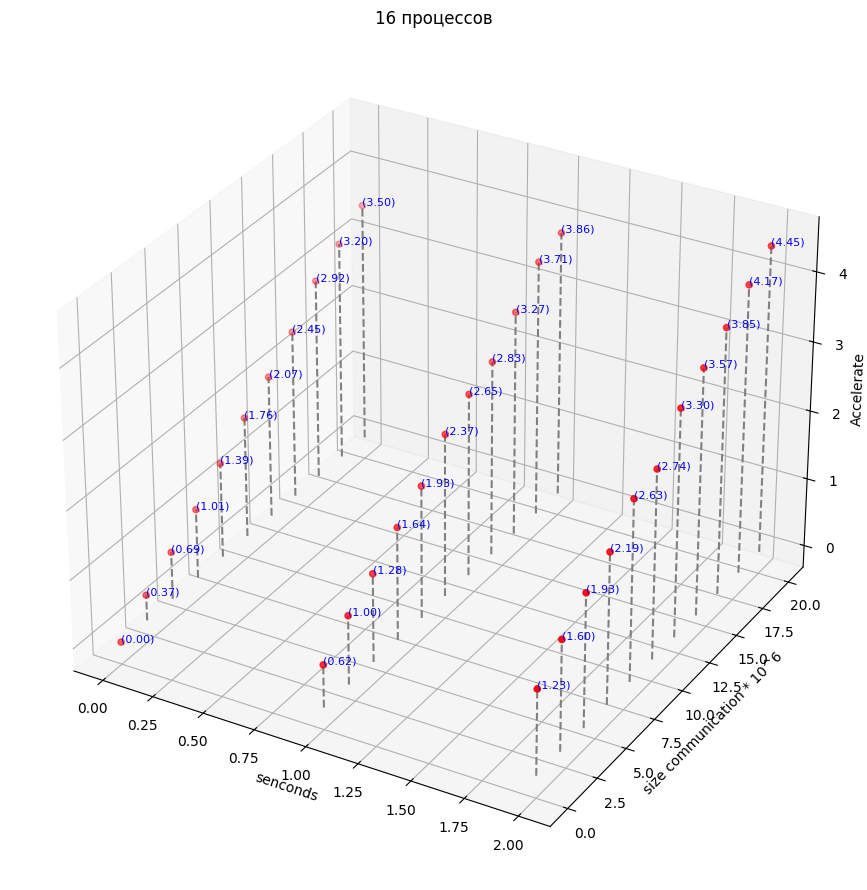

In [180]:
Draw.draw_3D_grafic("ssh/5/results_16.log", 'senconds', 'size communication * 10^6', 'Accelerate', '16 процессов', 1.622460)

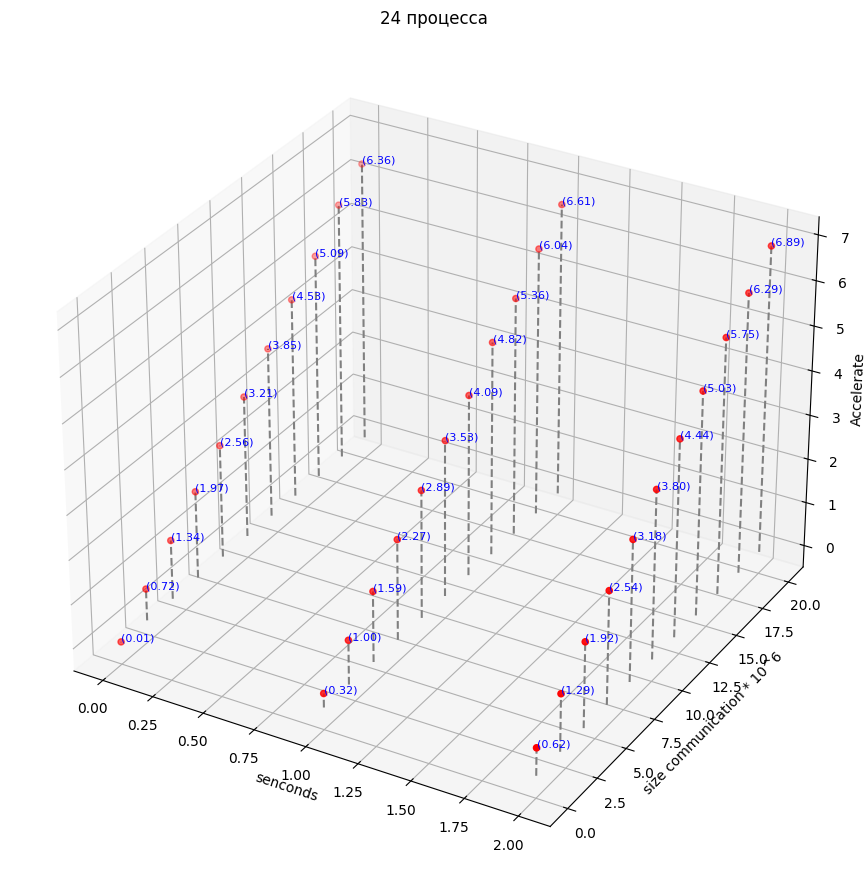

In [181]:
Draw.draw_3D_grafic("ssh/5/results_24.log", 'senconds', 'size communication * 10^6', 'Accelerate', '24 процесса', 3.277190)

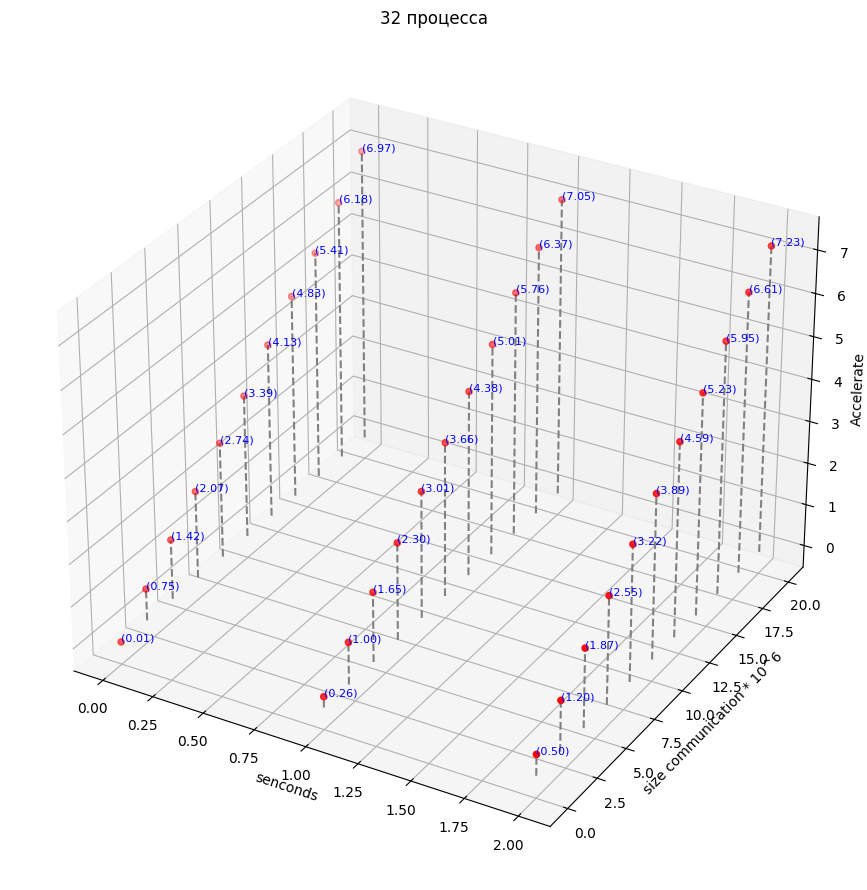

In [182]:
Draw.draw_3D_grafic("ssh/5/results_32.log", 'senconds', 'size communication * 10^6', 'Accelerate', '32 процесса', 4.081818)

# №6

In [183]:
labels = ['Buff', 'Simple', 'Sync']
dirs = [f"ssh/6/results{label}.log" for label in labels]
x = [(i + 1)**2 for i in range(10)]

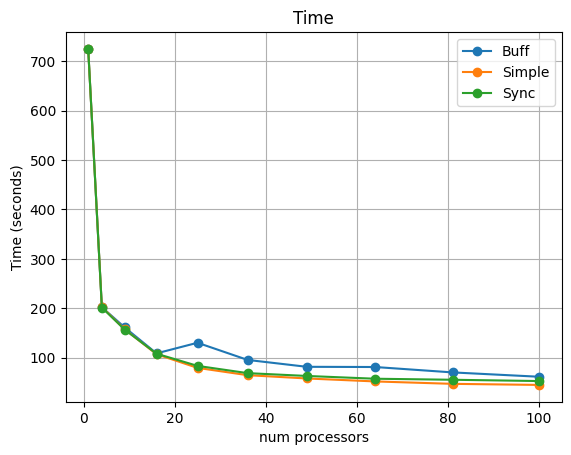

In [184]:
Draw.draw_grafics(dirs, labels, 'Time', x=x)

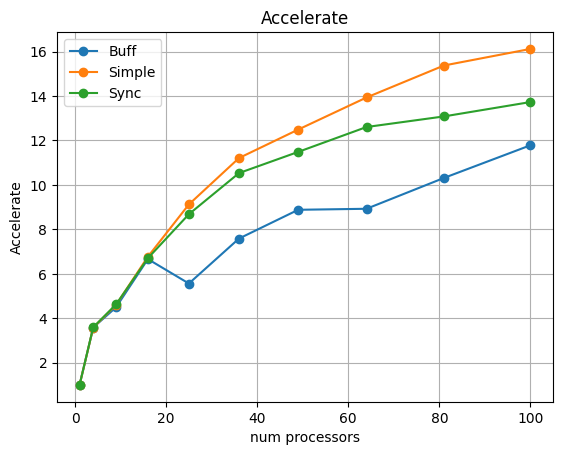

In [185]:
Draw.draw_grafics(dirs, labels, 'Accelerate', x=x)

# №7

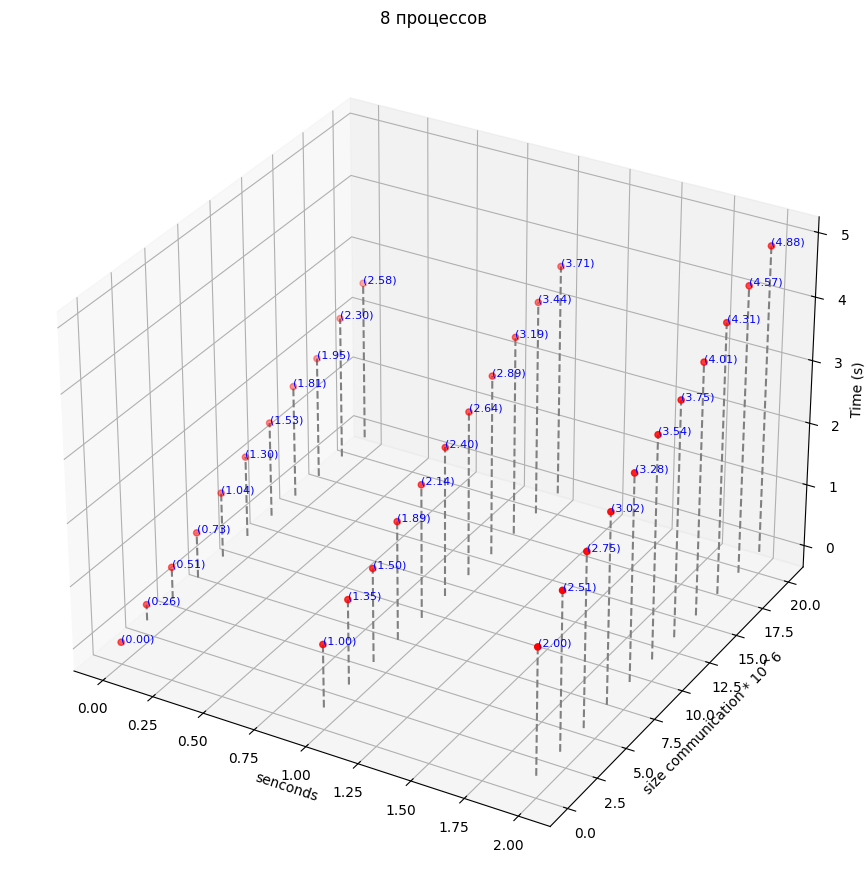

In [186]:
Draw.draw_3D_grafic("ssh/7/results_8.log", 'senconds', 'size communication * 10^6', 'Time (s)', '8 процессов', )

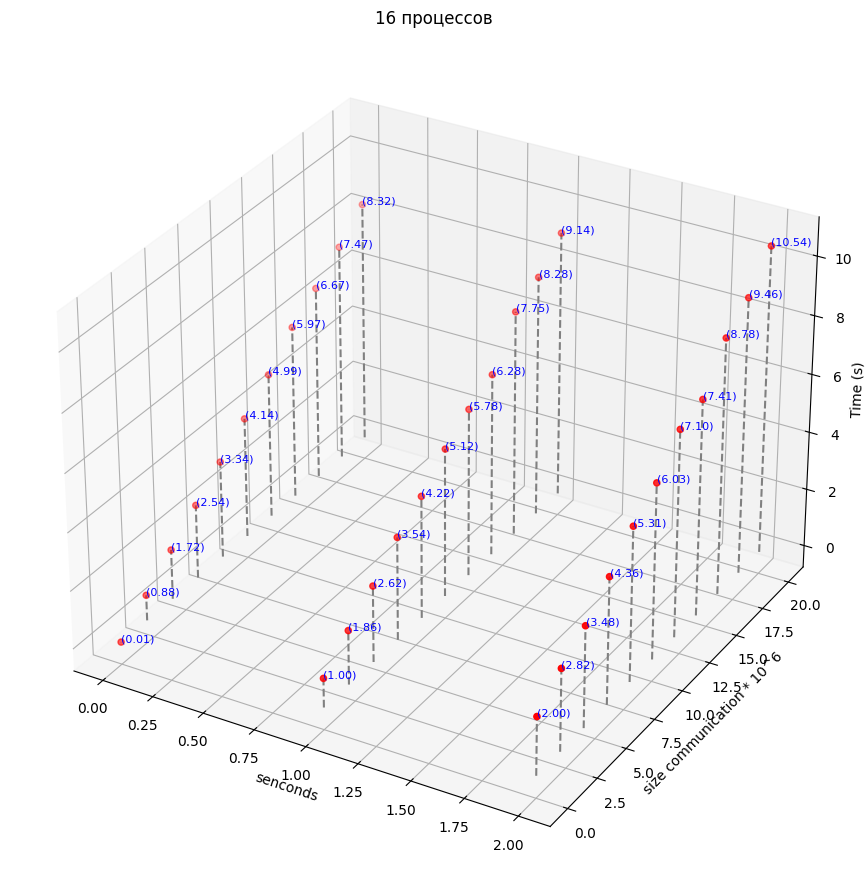

In [187]:
Draw.draw_3D_grafic("ssh/7/results_16.log", 'senconds', 'size communication * 10^6', 'Time (s)', '16 процессов')

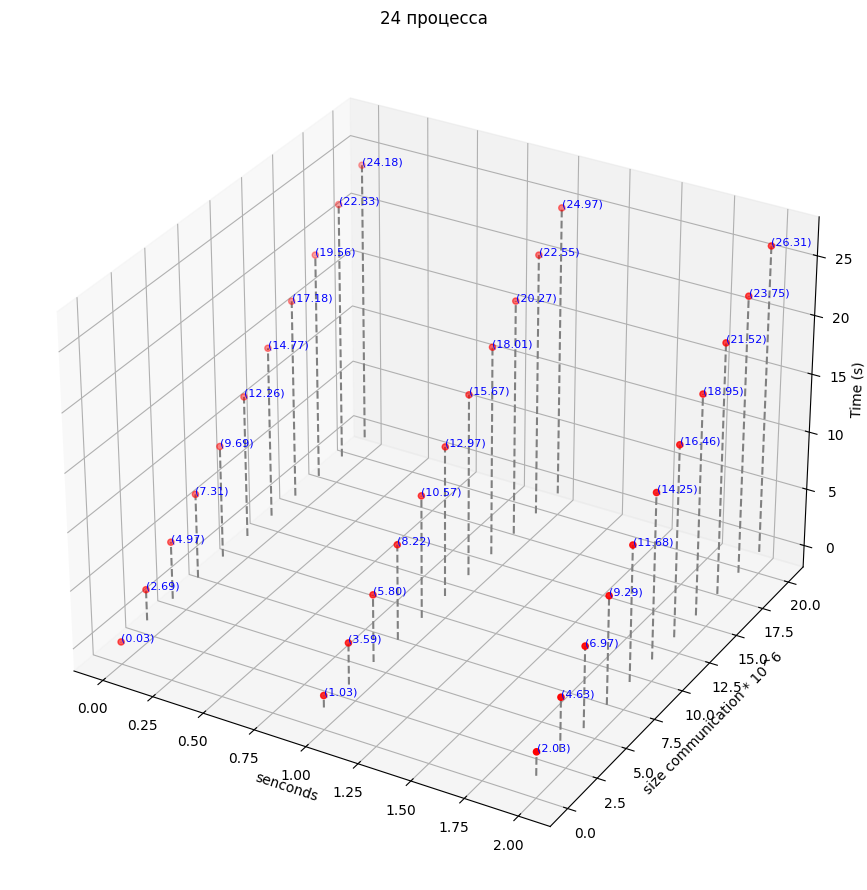

In [188]:
Draw.draw_3D_grafic("ssh/7/results_24.log", 'senconds', 'size communication * 10^6', 'Time (s)', '24 процесса')

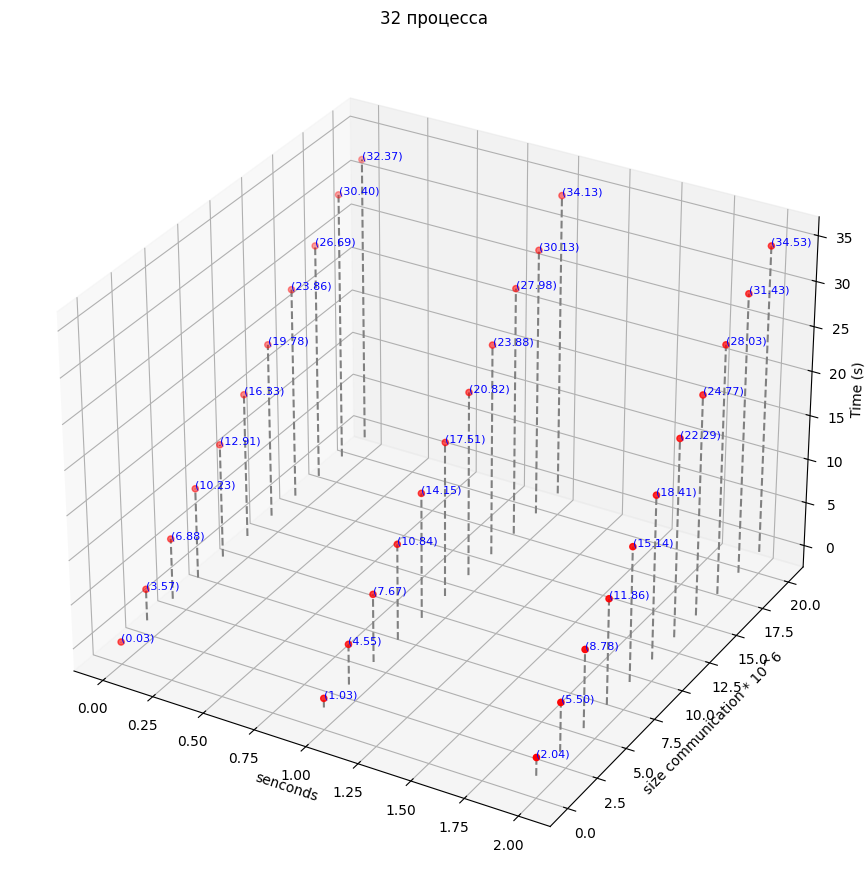

In [189]:
Draw.draw_3D_grafic("ssh/7/results_32.log", 'senconds', 'size communication * 10^6', 'Time (s)', '32 процесса')

# №8

In [190]:
labels = ['Simple', 'SendRecv', 'SendRecvReplace']
dirs = [f"ssh/8/results{label}.log" for label in labels]

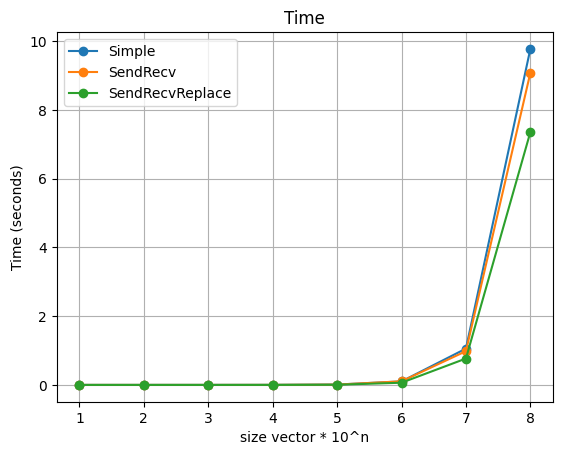

In [191]:
Draw.draw_grafics(dirs, labels, 'Time', x_label='size vector * 10^n')

# №9

In [199]:
labels = ['MPI', 'My realization']
x = [i*2 for i in range(1, 16 + 1)]

### Broadcast

In [194]:
x = [i*2 for i in range(1, 12 + 1)]
name = 'Broadcast'
size = 43243200
dirs = [f"ssh/9/results{name}-1.log", f"ssh/9/results{name}-0.log"]

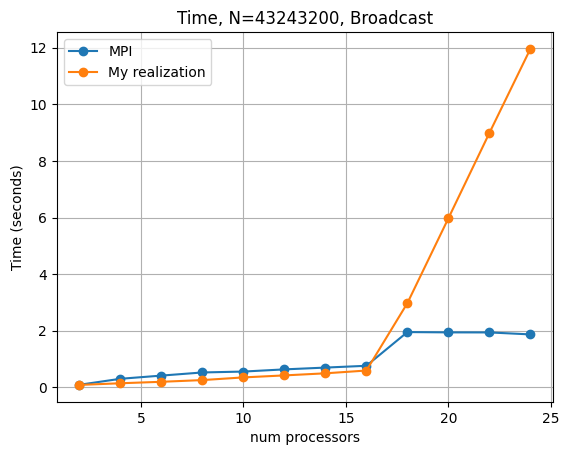

In [195]:
Draw.draw_grafics(dirs, labels, 'Time', size_input_data=size, info=name, x=x)

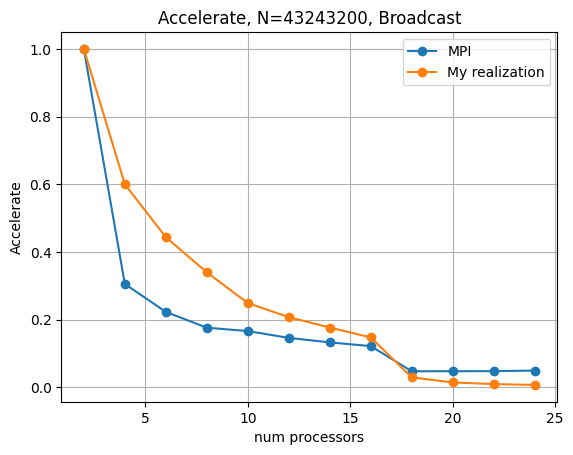

In [196]:
Draw.draw_grafics(dirs, labels, 'Accelerate', size_input_data=size, info=name, x=x)

### Reduce

In [200]:
name = 'Reduce'
size = 4324320
dirs = [f"ssh/9/results{name}-1.log", f"ssh/9/results{name}-0.log"]

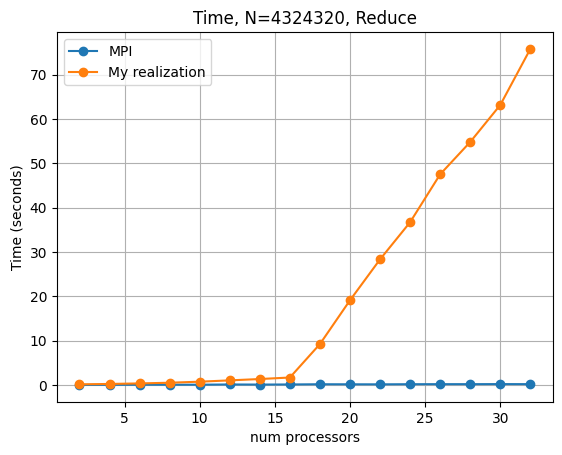

In [201]:
Draw.draw_grafics(dirs, labels, 'Time', size_input_data=size, info=name, x=x)

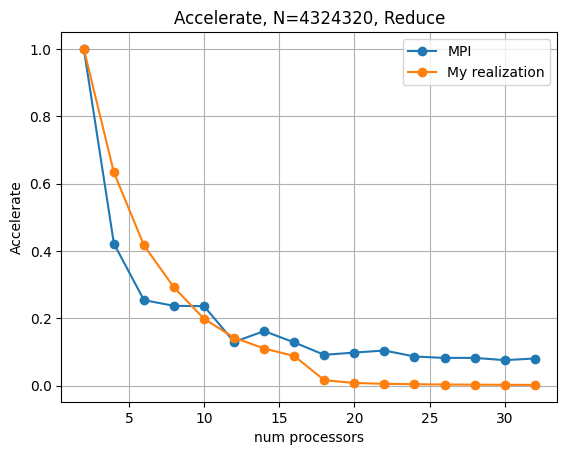

In [202]:
Draw.draw_grafics(dirs, labels, 'Accelerate', size_input_data=size, info=name, x=x)

### Scatter

In [203]:
name = 'Scatter'
size = 43243200
dirs = [f"ssh/9/results{name}-1.log", f"ssh/9/results{name}-0.log"]

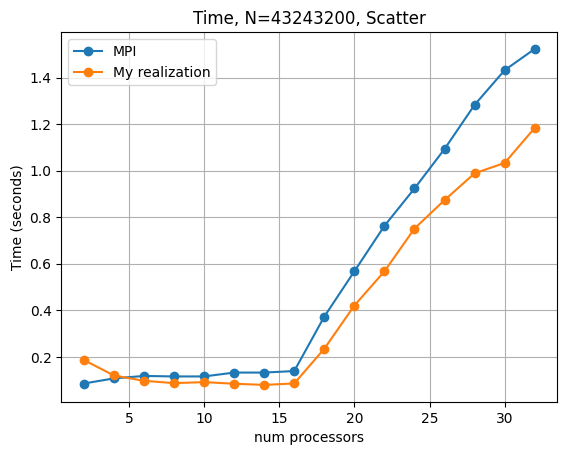

In [204]:
Draw.draw_grafics(dirs, labels, 'Time', size_input_data=size, info=name, x=x)

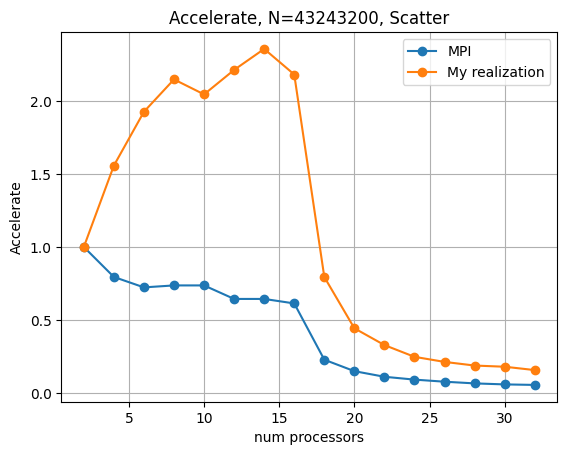

In [205]:
Draw.draw_grafics(dirs, labels, 'Accelerate', size_input_data=size, info=name, x=x)

### Gather

In [206]:
name = 'Gather'
size = 43243200
dirs = [f"ssh/9/results{name}-1.log", f"ssh/9/results{name}-0.log"]

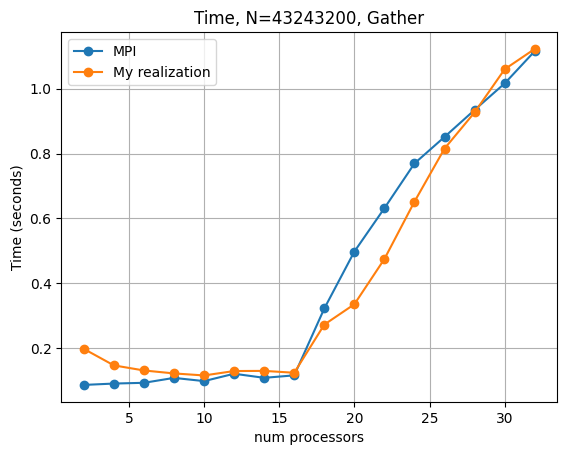

In [207]:
Draw.draw_grafics(dirs, labels, 'Time', size_input_data=size, info=name, x=x)

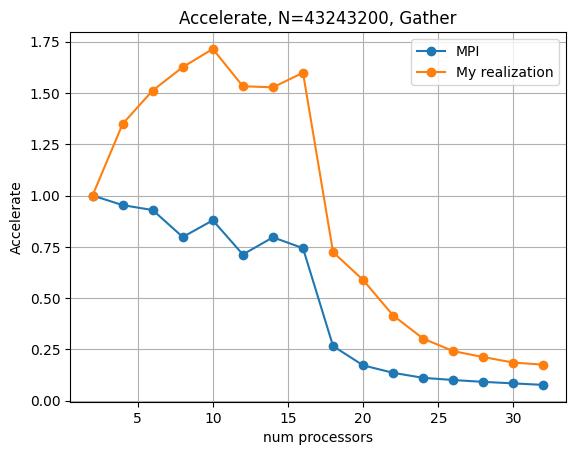

In [208]:
Draw.draw_grafics(dirs, labels, 'Accelerate', size_input_data=size, info=name, x=x)

### AlltoAll

In [209]:
name = 'AlltoAll'
size = 43243200
dirs = [f"ssh/9/results{name}-1.log", f"ssh/9/results{name}-0.log"]

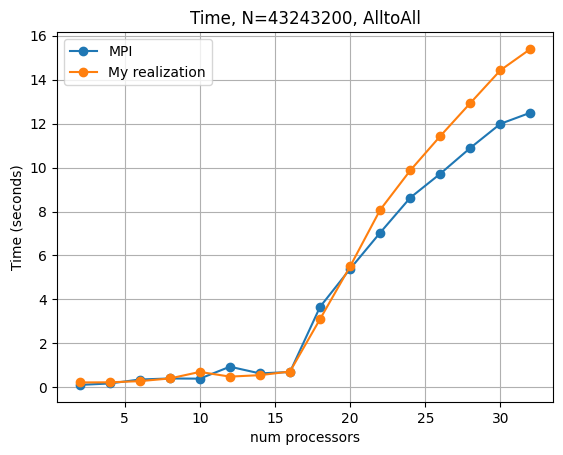

In [210]:
Draw.draw_grafics(dirs, labels, 'Time', size_input_data=size, info=name, x=x)

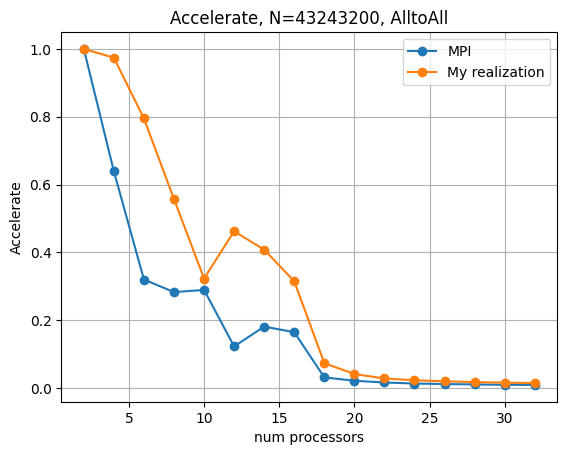

In [211]:
Draw.draw_grafics(dirs, labels, 'Accelerate', size_input_data=size, info=name, x=x)

### AllGather

In [212]:
name = 'AllGather'
size = 43243200
dirs = [f"ssh/9/results{name}-1.log", f"ssh/9/results{name}-0.log"]

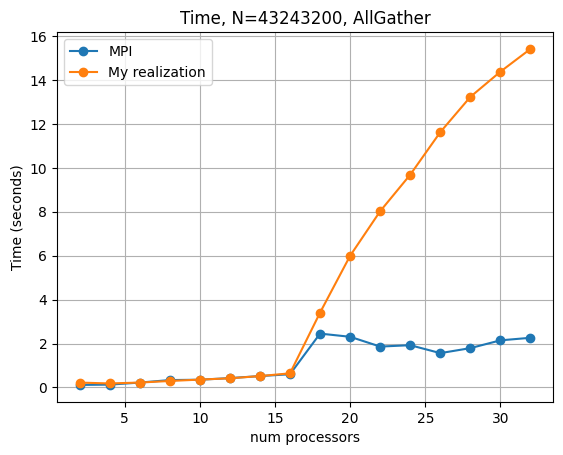

In [213]:
Draw.draw_grafics(dirs, labels, 'Time', size_input_data=size, info=name, x=x)

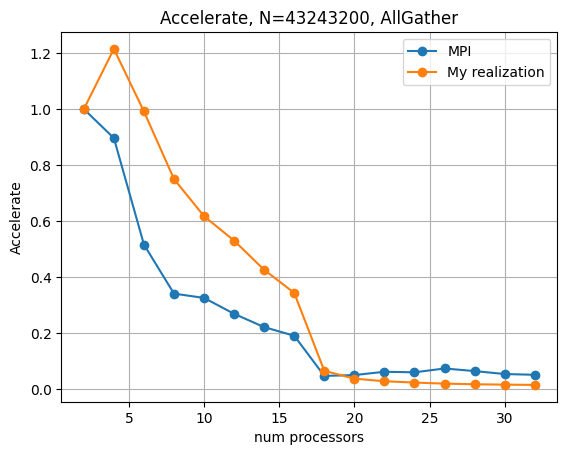

In [214]:
Draw.draw_grafics(dirs, labels, 'Accelerate', size_input_data=size, info=name, x=x)

# №10

In [215]:
labels = ['Type', 'Simple', 'Pack']
dirs = [f"ssh/10/results{label}.log" for label in labels]
x = [i*2 for i in range(1, 16 + 1)]

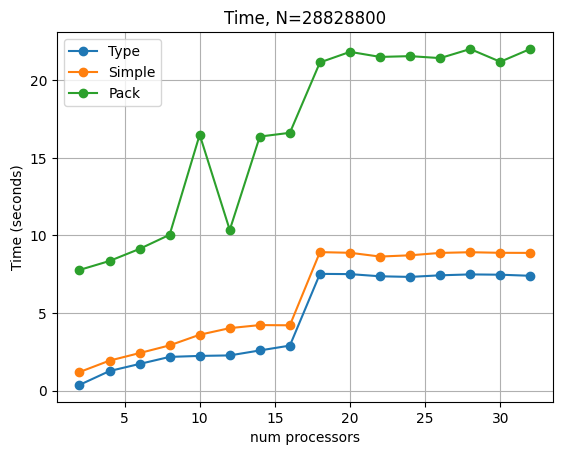

In [216]:
Draw.draw_grafics(dirs, labels, 'Time', 28828800, x=x)

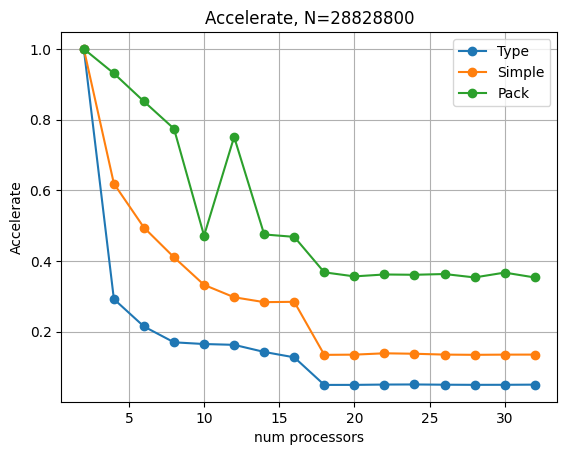

In [217]:
Draw.draw_grafics(dirs, labels, 'Accelerate', 28828800, x=x)

# №11

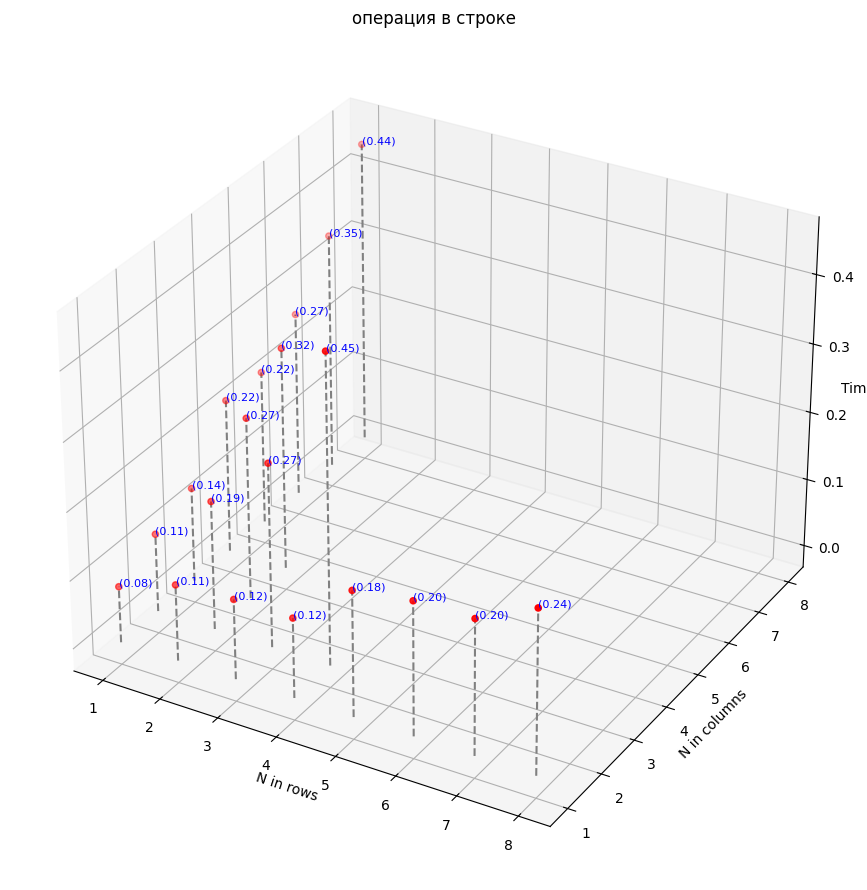

In [218]:
Draw.draw_3D_grafic("ssh/11/results-0.log", 'N in rows', 'N in columns', 'Time', 'операция в строке')

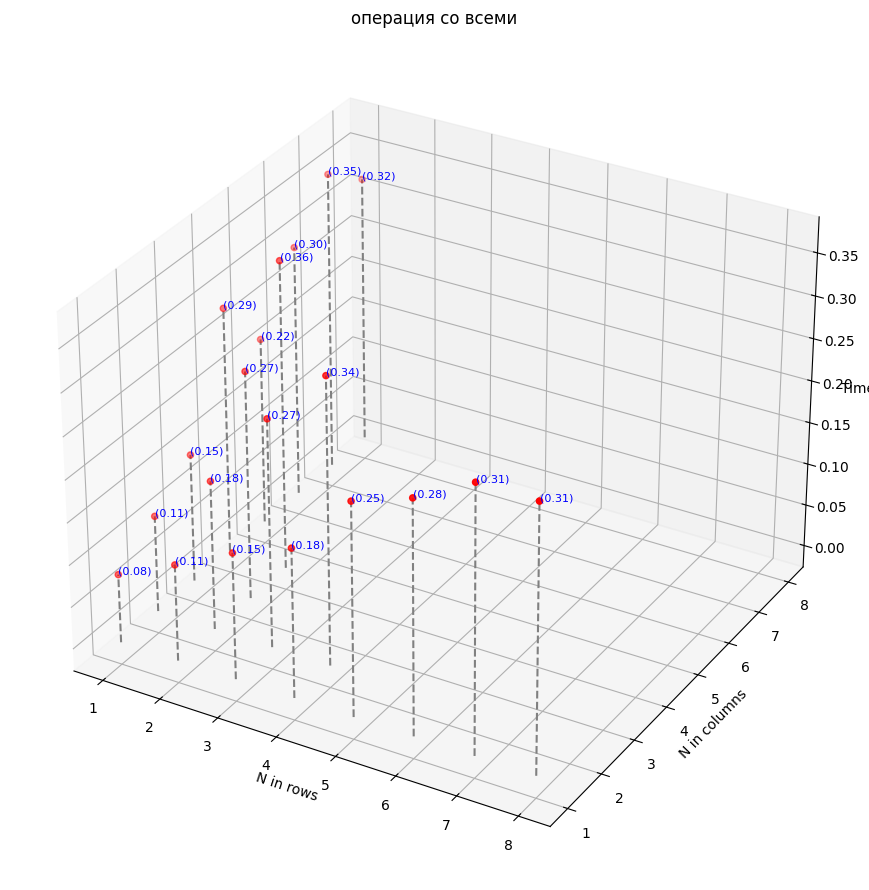

In [219]:
Draw.draw_3D_grafic("ssh/11/results-1.log", 'N in rows', 'N in columns', 'Time', 'операция со всеми')

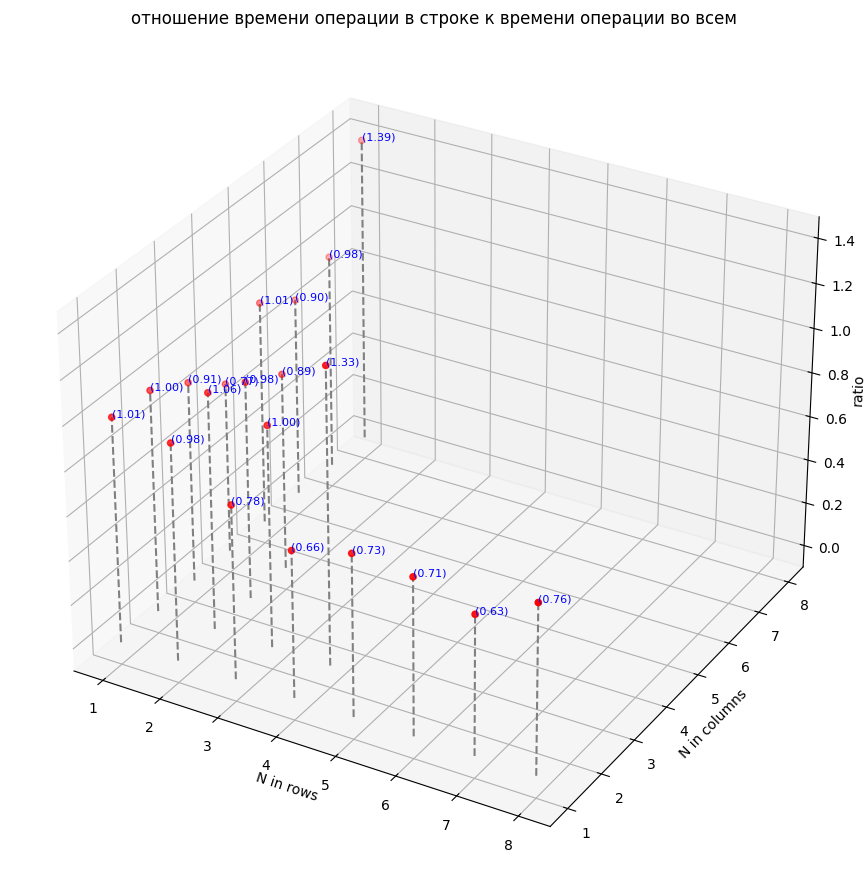

In [220]:
Draw.draw_3D_grafic("ssh/11/resultsRatio.log", 'N in rows', 'N in columns', 'ratio', 'отношение времени операции в строке к времени операции во всем')